Пиксельная маска части изображения

Дано:

изображение (формат jpg/png)
диапазон строк для маски (y_min, y_max)
диапазон столбцов для маски (x_min, x_max)
число разбиений на области (h, например, для h=10 маска разбивается на 10*10=100 равх обл



астей)
Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread, imsave

Дано:

In [7]:
h = 20
y_min = 450 
y_max = 650
x_min = 700
x_max = 1300

Добавляем изображение которое хотим обработать

In [8]:
img_before = imread('before.jpg')

Выведем его для проверки

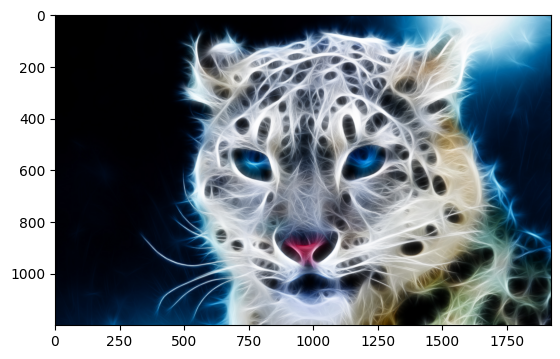

In [9]:
plt.imshow(img_before)

Создадим копию изображения, которую и будем цензурить

In [15]:
img_copy = img_before.copy()

Преобразуем изображение в двумерный массив

In [16]:
img_after = np.asarray(img_copy)

Вычисляем ширину и высоту области

In [17]:
area_height = (y_max - y_min) // h
area_width = (x_max - x_min) // h

Производим зацензуривание заданной области. Проходясь по каждому блоку области

In [18]:
    for i in range(h):
        for j in range(h):
            # Вычисляем координаты верхнего левого угла области
            area_y_min = y_min + i * area_height
            area_y_max = area_y_min + area_height
            area_x_min = x_min + j * area_width
            area_x_max = area_x_min + area_width

            # Закрашиваем область
            img_after[area_y_min:area_y_max, area_x_min:area_x_max] = np.mean(img_after[area_y_min:area_y_max, area_x_min:area_x_max])

Выводим результат

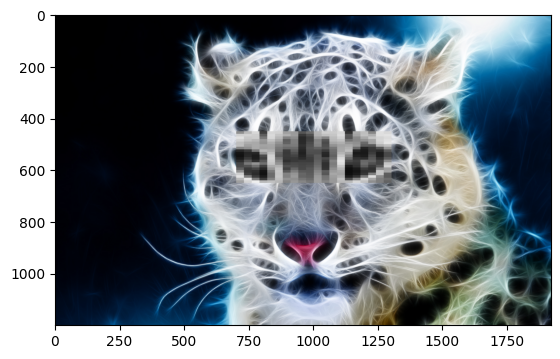

In [19]:
plt.imshow(img_after)
plt.show()

Сохраняем изображения после зацензуривания

In [21]:
imsave('after.jpg', img_after)